# Source sensitivity calculations

In [43]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

## Dataset

In [44]:
tubes = {
    'J305': {
        'sensitivity': 135.115,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.116,
            'Tc-99m': 6.402,
            'I-131': 0.992,
            'Lu-177': 3.498,
            'Am-241': 11.952,
            'Radium': 1.064,
            'Uranium ore': 1.211,
            'Uranium glaze': 1.368,
            'Depleted uranium': 1.354,
            'Thorium ore': 1.114,
            'X-ray tube (60 kV)': 5.478,
            'K-40': 1.053,
            'Natural background': 2.791,
        }
    },
    'M4011': {
        'sensitivity': 108.683,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.112,
            'Tc-99m': 6.385,
            'I-131': 0.990,
            'Lu-177': 3.501,
            'Am-241': 11.858,
            'Radium': 1.063,
            'Uranium ore': 1.210,
            'Uranium glaze': 1.367,
            'Depleted uranium': 1.353,
            'Thorium ore': 1.115,
            'X-ray tube (60 kV)': 5.444,
            'K-40': 1.050,
            'Natural background': 2.788,
        }
    },
    'HH614': {
        'sensitivity': 38.261,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.372,
            'Tc-99m': 2.568,
            'I-131': 0.759,
            'Lu-177': 1.112,
            'Am-241': 4.472,
            'Radium': 0.978,
            'Uranium ore': 1.009,
            'Uranium glaze': 1.048,
            'Depleted uranium': 1.114,
            'Thorium ore': 0.404,
            'X-ray tube (60 kV)': 2.424,
            'K-40': 1.401,
            'Natural background': 1.377,
        }
    },
    'SBM20': {
        'sensitivity': 106.709,
        'sources': {
            'Cs-137': 1,
            'Co-60': 0.786,
            'Tc-99m': 3.265,
            'I-131': 0.915,
            'Lu-177': 1.423,
            'Am-241': 6.791,
            'Radium': 0.868,
            'Uranium ore': 0.961,
            'Uranium glaze': 1.054,
            'Depleted uranium': 1.051,
            'Thorium ore': 0.860,
            'X-ray tube (60 kV)': 5.678,
            'K-40': 0.732,
            'Natural background': 1.769,
        }
    },
    'SI3BG': {
        'sensitivity': 4.856,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.402,
            'Tc-99m': 2.438,
            'I-131': 0.764,
            'Lu-177': 1.115,
            'Am-241': 0.553,
            'Radium': 0.995,
            'Uranium ore': 0.982,
            'Uranium glaze': 1.020,
            'Depleted uranium': 1.104,
            'Thorium ore': 0.688,
            'X-ray tube (60 kV)': 0.125,
            'K-40': 1.486,
            'Natural background': 0.686,
        }
    },
    'LND 7317': {
        'sensitivity': 350,
        'sources': {
            'Cs-137': 1,
            'Co-60': 1.005,
            'Tc-99m': 2.831,
            'I-131': 0.908,
            'Lu-177': 1.445,
            'Am-241': 5.108,
            'Radium': 0.980,
            'Uranium ore': 1.056,
            'Uranium glaze': 1.131,
            'Depleted uranium': 1.125,
            'Thorium ore': 0.997,
            'X-ray tube (60 kV)': 4.744,
            'K-40': 0.989,
            'Natural background': 1.762,
        }
    },
}


## Analysis

In [45]:
tubes_sources = np.zeros((6, 14))
sensitivities = set()

for tube_index, tube in enumerate(tubes):
    contents = tubes[tube]
    sources = contents['sources']
    for source_index, source in enumerate(sources):
        sensitivity = sources[source]

        tubes_sources[tube_index][source_index] = sensitivity
        sensitivities.add(sensitivity)

x = np.array(list(sensitivities))
x.sort()

Minimum value:  0.125
Maximum value:  11.952


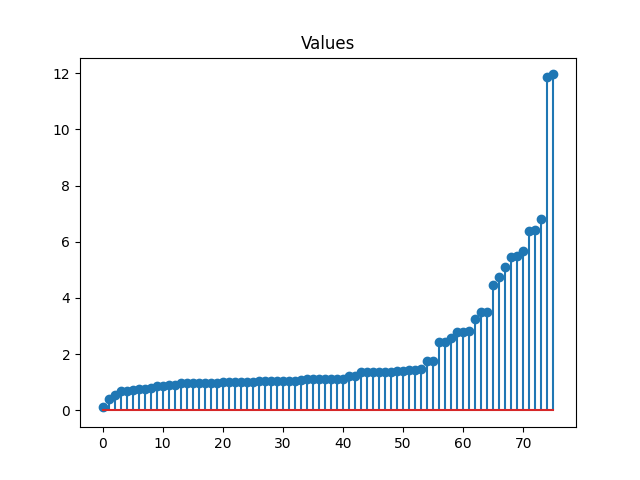

In [46]:
plt.figure()
plt.title('Values')
plt.stem(x)

print('Minimum value: ', np.min(tubes_sources))
print('Maximum value: ', np.max(tubes_sources))

## Encoding and decoding

In [47]:
x_min = 0.125
octaves = 7
scale = 36

x_enc = np.int32(np.trunc(scale * np.log2(tubes_sources / x_min)))
x_dec = x_min * np.exp2(x_enc / scale)

x_delta = tubes_sources - x_dec

In [48]:
print('Tubes sensitivity:')
print(tubes_sources)

Tubes sensitivity:
[[ 1.     1.116  6.402  0.992  3.498 11.952  1.064  1.211  1.368  1.354
   1.114  5.478  1.053  2.791]
 [ 1.     1.112  6.385  0.99   3.501 11.858  1.063  1.21   1.367  1.353
   1.115  5.444  1.05   2.788]
 [ 1.     1.372  2.568  0.759  1.112  4.472  0.978  1.009  1.048  1.114
   0.404  2.424  1.401  1.377]
 [ 1.     0.786  3.265  0.915  1.423  6.791  0.868  0.961  1.054  1.051
   0.86   5.678  0.732  1.769]
 [ 1.     1.402  2.438  0.764  1.115  0.553  0.995  0.982  1.02   1.104
   0.688  0.125  1.486  0.686]
 [ 1.     1.005  2.831  0.908  1.445  5.108  0.98   1.056  1.131  1.125
   0.997  4.744  0.989  1.762]]


In [49]:

print('Encoded values:')
print(x_enc)

Encoded values:
[[108 113 204 107 173 236 111 117 124 123 113 196 110 161]
 [108 113 204 107 173 236 111 117 124 123 113 196 110 161]
 [108 124 156  93 113 185 106 108 110 113  60 153 125 124]
 [108  95 169 103 126 207 100 105 110 110 100 198  91 137]
 [108 125 154  94 113  77 107 107 109 113  88   0 128  88]
 [108 108 162 102 127 192 106 110 114 114 107 188 107 137]]


In [50]:

print('Decoded values:')
print(x_dec)

Decoded values:
[[ 1.          1.1010568   6.34960421  0.98093009  3.49563743 11.75787594
   1.05946309  1.18920712  1.36079     1.33483985  1.1010568   5.44316
   1.03925923  2.77448927]
 [ 1.          1.1010568   6.34960421  0.98093009  3.49563743 11.75787594
   1.05946309  1.18920712  1.36079     1.33483985  1.1010568   5.44316
   1.03925923  2.77448927]
 [ 1.          1.36079     2.5198421   0.74915354  1.1010568   4.40422718
   0.96222384  1.          1.03925923  1.1010568   0.39685026  2.37841423
   1.38724463  1.36079   ]
 [ 1.          0.77856473  3.2365223   0.90821836  1.41421356  6.72717132
   0.85724398  0.94387431  1.03925923  1.03925923  0.85724398  5.65685425
   0.72085339  1.74781872]
 [ 1.          1.38724463  2.42465213  0.76371757  1.1010568   0.5505284
   0.98093009  0.98093009  1.01944064  1.1010568   0.680395    0.125
   1.46973449  0.680395  ]
 [ 1.          1.          2.82842712  0.89089872  1.44170678  5.0396842
   0.96222384  1.03925923  1.12246205  1.1224620

In [51]:

print('Difference:')
print(x_delta)

Difference:
[[0.         0.0149432  0.05239579 0.01106991 0.00236257 0.19412406
  0.00453691 0.02179288 0.00721    0.01916015 0.0129432  0.03484
  0.01374077 0.01651073]
 [0.         0.0109432  0.03539579 0.00906991 0.00536257 0.10012406
  0.00353691 0.02079288 0.00621    0.01816015 0.0139432  0.00084
  0.01074077 0.01351073]
 [0.         0.01121    0.0481579  0.00984646 0.0109432  0.06777282
  0.01577616 0.009      0.00874077 0.0129432  0.00714974 0.04558577
  0.01375537 0.01621   ]
 [0.         0.00743527 0.0284777  0.00678164 0.00878644 0.06382868
  0.01075602 0.01712569 0.01474077 0.01174077 0.00275602 0.02114575
  0.01114661 0.02118128]
 [0.         0.01475537 0.01334787 0.00028243 0.0139432  0.0024716
  0.01406991 0.00106991 0.00055936 0.0029432  0.007605   0.
  0.01626551 0.005605  ]
 [0.         0.005      0.00257288 0.01710128 0.00329322 0.0683158
  0.01777616 0.01674077 0.00853795 0.00253795 0.01606991 0.07788384
  0.00806991 0.01418128]]


In [52]:
print('RMS error:')
print(np.sqrt(np.mean(x_delta ** 2)))

RMS error:
0.032190699323498634
